# Understanding age respired CO2 vs age of the NSC for trees that experience a reduction in the income over time and has to readapt. what happens if there is a reduction in the income and a change in the turnover times of the carbon. 

In [2]:
from CompartmentalSystems.smooth_reservoir_model import SmoothReservoirModel
from CompartmentalSystems.smooth_model_run import SmoothModelRun 
from CompartmentalSystems.start_distributions import start_age_distributions_from_steady_state,start_age_moments_from_steady_state
from sympy import Symbol, symbols, Function
from plotly.offline import plot
import numpy as np
import matplotlib
#matplotlib.use('Agg') # Must be before importing matplotlib.pyplot or pylab!
import matplotlib.pyplot as plt

In [3]:
FSNSC, FANSC, FB = symbols('FSNSC FANSC FB') 
SANSC, SSNSC, SB =symbols('SANSC SSNSC SB')
RANSC, RSNSC, RB =symbols('RANSC RSNSC RB')
Rf, Lf, Cf, FtoS, Sf,Gf = symbols('Rf Lf Cf FtoS Sf Gf')
StoF, Rs, Ss, Cs, Gs, Ls, Stor =symbols('StoF Rs Ss Cs Gs Ls Stor')
Rr, Sr, Cr, Gr, Lr, rtoS =symbols('Rr Sr Cr Gr Lr rtoS')
state_vector = [FANSC, FSNSC, SANSC, SSNSC,RANSC, RSNSC]
t = Symbol('t')

f_expr = Function('f')(t)

def f_step(t):
    t_step=10
    val=230000 if t<t_step else 2300
    return val

func_set_step = {f_expr: f_step}

input_fluxes = {0: f_expr} 
output_fluxes = {
    0:Rf*FANSC+Gf*FANSC, 
    2:Rs*SANSC+Gs*SANSC,
    4:Rr*RANSC+Gr*RANSC
    }

internal_fluxes = {
    (1,0):Cf*FSNSC, 
    (0,1):Sf*FANSC, 
    (0,2):FtoS*FANSC,
    (2,0):StoF*SANSC,
    (2,3):Ss*SANSC,
    (2,4):Stor*SANSC,
    (3,2):Cs*SSNSC,
    (4,5):Sr*RANSC,
    (5,4):Cr*RSNSC,
    (4,2):rtoS*RANSC
    }


In [23]:
srm = SmoothReservoirModel(state_vector, t, input_fluxes, output_fluxes, internal_fluxes)
#t0=0 ##start value default 
start_t=0 ## start value
parameter_set={
        Rf:1, 
        Cf:1, 
        FtoS:1, 
        Sf:1, 
        Gf:1,
        StoF:1,
        Rs:1,
        Cs:1,
        Ss:1,
        Gs:1,
        Rr:1,
        Stor:1,
        Sr:1,
        Cr:1,
        Gr:1,
        rtoS:1, #this flux goes from the pool 6 (RLNSC) ot the pool 3 (SLNSC). 
        }
parameter_set2={
        Rf:1, 
        Cf:1, 
        FtoS:1, 
        Sf:1, 
        Gf:1,
        StoF:1,
        Rs:1,
        Cs:1/3,
        Ss:1*5,
        Gs:1,
        Rr:1,
        Stor:1,
        Sr:1,
        Cr:1,
        Gr:1,
        rtoS:1, #this flux goes from the pool 6 (RLNSC) ot the pool 3 (SLNSC). 
        }

parameter_set3={
        Rf:1*3, 
        Cf:1, 
        FtoS:1, 
        Sf:1, 
        Gf:1*3,
        StoF:1/10,
        Rs:1*50,
        Cs:1*100,
        Ss:1/50,
        Gs:1*50,
        Rr:1*50,
        Stor:1/10,
        Sr:1/50,
        Cr:1*50,
        Gr:1*50,
        rtoS:1, #this flux goes from the pool 6 (RLNSC) ot the pool 3 (SLNSC). 
        }



In [36]:
a_dens_function,x_fix = start_age_distributions_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set,
    func_set=func_set_step
)
a_dens_function2,x_fix2 = start_age_distributions_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set2,
    func_set=func_set_step
)
a_dens_function3,x_fix3 = start_age_distributions_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set3,
    func_set=func_set_step
)
# a_dens_function4,x_fix4 = start_age_distributions_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set4,
#     func_set=func_set_step
# )
# a_dens_function5,x_fix5 = start_age_distributions_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set5,
#     func_set=func_set_step
# )
# a_dens_function6,x_fix6 = start_age_distributions_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set6,
#     func_set=func_set_step
# )


times = np.linspace(start_t,100,100)
smr = SmoothModelRun(srm, parameter_dict=parameter_set, start_values=x_fix, times=times,func_set=func_set_step)
smr2 = SmoothModelRun(srm, parameter_dict=parameter_set2, start_values=x_fix2, times=times,func_set=func_set_step)
smr3 = SmoothModelRun(srm, parameter_dict=parameter_set3, start_values=x_fix3, times=times,func_set=func_set_step)
# smr4 = SmoothModelRun(srm, parameter_dict=parameter_set4, start_values=x_fix4, times=times,func_set=func_set_step)
# smr5 = SmoothModelRun(srm, parameter_dict=parameter_set5, start_values=x_fix5, times=times,func_set=func_set_step)
# smr6 = SmoothModelRun(srm, parameter_dict=parameter_set6, start_values=x_fix6, times=times,func_set=func_set_step)

p=smr.pool_age_densities_func(a_dens_function)
p2=smr2.pool_age_densities_func(a_dens_function2)
p3=smr3.pool_age_densities_func(a_dens_function3)
# p4=smr4.pool_age_densities_func(a_dens_function4)
# p5=smr5.pool_age_densities_func(a_dens_function5)
# p6=smr6.pool_age_densities_func(a_dens_function6)


ages=np.linspace(0,10,200)
pool_dens_data=p(ages)
pool_dens_data2=p2(ages)
pool_dens_data3=p3(ages)
# pool_dens_data4=p4(ages)
# pool_dens_data5=p5(ages)
# pool_dens_data6=p6(ages)

system_dens_data=smr.system_age_density(pool_dens_data)
system_dens_data2=smr2.system_age_density(pool_dens_data2)
system_dens_data3=smr3.system_age_density(pool_dens_data3)
# system_dens_data4=smr4.system_age_density(pool_dens_data4)
# system_dens_data5=smr5.system_age_density(pool_dens_data5)
# system_dens_data6=smr5.system_age_density(pool_dens_data6)



start_mean_ages=start_age_moments_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set,
    func_set=func_set_step,
    max_order=1
)

start_mean_ages2=start_age_moments_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set2,
    func_set=func_set_step,
    max_order=1
)

start_mean_ages3=start_age_moments_from_steady_state(
    srm,
    t0=start_t,
    parameter_dict=parameter_set3,
    func_set=func_set_step,
    max_order=1
)
# start_mean_ages4=start_age_moments_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set4,
#     func_set=func_set_step,
#     max_order=1
# )
# start_mean_ages5=start_age_moments_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set5,
#     func_set=func_set_step,
#     max_order=1
# )
# start_mean_ages6=start_age_moments_from_steady_state(
#     srm,
#     t0=start_t,
#     parameter_dict=parameter_set6,
#     func_set=func_set_step,
#     max_order=1
# )

############################################
in function: lapm_for_steady_state
x_fix = [84333.33333333 84333.33333333 23000.         23000.
  7666.66666667  7666.66666667]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
B0 = [[-4  1  1  0  0  0]
 [ 1 -1  0  0  0  0]
 [ 1  0 -5  1  1  0]
 [ 0  0  1 -1  0  0]
 [ 0  0  1  0 -4  1]
 [ 0  0  0  0  1 -1]]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
u0 = [[230000]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
x_fix = [ 84333.33333333  84333.33333333  23000.         345000.
   7666.66666667   7666.66666667]
 type: <class 'numpy.ndarray'>
###############################

100%|██████████| 200/200 [33:36<00:00, 15.81s/it]


############################################
in function: lapm_for_steady_state
x_fix = [84333.33333333 84333.33333333 23000.         23000.
  7666.66666667  7666.66666667]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
B0 = [[-4  1  1  0  0  0]
 [ 1 -1  0  0  0  0]
 [ 1  0 -5  1  1  0]
 [ 0  0  1 -1  0  0]
 [ 0  0  1  0 -4  1]
 [ 0  0  0  0  1 -1]]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
u0 = [[230000]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]]
 type: <class 'numpy.ndarray'>
############################################
############################################
in function: lapm_for_steady_state
x_fix = [ 84333.33333333  84333.33333333  23000.         345000.
   7666.66666667   7666.66666667]
 type: <class 'numpy.ndarray'>
###############################

In [37]:
mean_sys_age=smr.system_age_moment(1, start_mean_ages)
mean_sys_age2=smr2.system_age_moment(1, start_mean_ages2)
mean_sys_age3=smr3.system_age_moment(1, start_mean_ages3)
# mean_sys_age4=smr4.system_age_moment(1, start_mean_ages4)
# mean_sys_age5=smr5.system_age_moment(1, start_mean_ages5)
# mean_sys_age6=smr6.system_age_moment(1, start_mean_ages6)

In [38]:
btt_dens= smr.backward_transit_time_density(pool_dens_data)
btt_dens2= smr2.backward_transit_time_density(pool_dens_data2)
btt_dens3= smr3.backward_transit_time_density(pool_dens_data3)
# btt_dens4= smr4.backward_transit_time_density(pool_dens_data4)
# btt_dens5= smr5.backward_transit_time_density(pool_dens_data5)
# btt_dens6= smr6.backward_transit_time_density(pool_dens_data6)

btt_moment=smr.backward_transit_time_moment(1, start_mean_ages)
btt_moment2=smr2.backward_transit_time_moment(1, start_mean_ages2)
btt_moment3=smr3.backward_transit_time_moment(1, start_mean_ages3)
# btt_moment4=smr4.backward_transit_time_moment(1, start_mean_ages4)
# btt_moment5=smr5.backward_transit_time_moment(1, start_mean_ages5)
# btt_moment6=smr6.backward_transit_time_moment(1, start_mean_ages6)

In [39]:
mean_sys_age2

btt_moment2

array([ 2.4       ,  2.4       ,  2.4       ,  2.4       ,  2.4       ,
        2.4       ,  2.4       ,  2.4       ,  2.4       ,  2.4       ,
        2.88829468,  6.23822118,  7.99298327,  9.46153226, 10.72180689,
       11.81344956, 12.7789433 , 13.65076527, 14.44911367, 15.18442435,
       15.86053795, 16.47718667, 17.03168161, 17.52000733, 17.9375433 ,
       18.27957053, 18.54165955, 18.71999343, 18.81165043, 18.81485127,
       18.72916628, 18.55567092, 18.2970368 , 17.9575471 , 17.5430299 ,
       17.06070945, 16.51898263, 15.92713551, 15.29502002, 14.63271426,
       13.95019032, 13.25701071, 12.56207198, 11.87340438, 11.19803455,
       10.5419093 ,  9.9098757 ,  9.3057085 ,  8.73217479,  8.19112505,
        7.68360066,  7.20994895,  6.76993893,  6.362872  ,  5.98768432,
        5.64303831,  5.3274025 ,  5.0391192 ,  4.77646077,  4.53767517,
        4.32102205,  4.12480036,  3.94736899,  3.7871614 ,  3.6426954 ,
        3.51257895,  3.39551295,  3.29029142,  3.19580015,  3.11

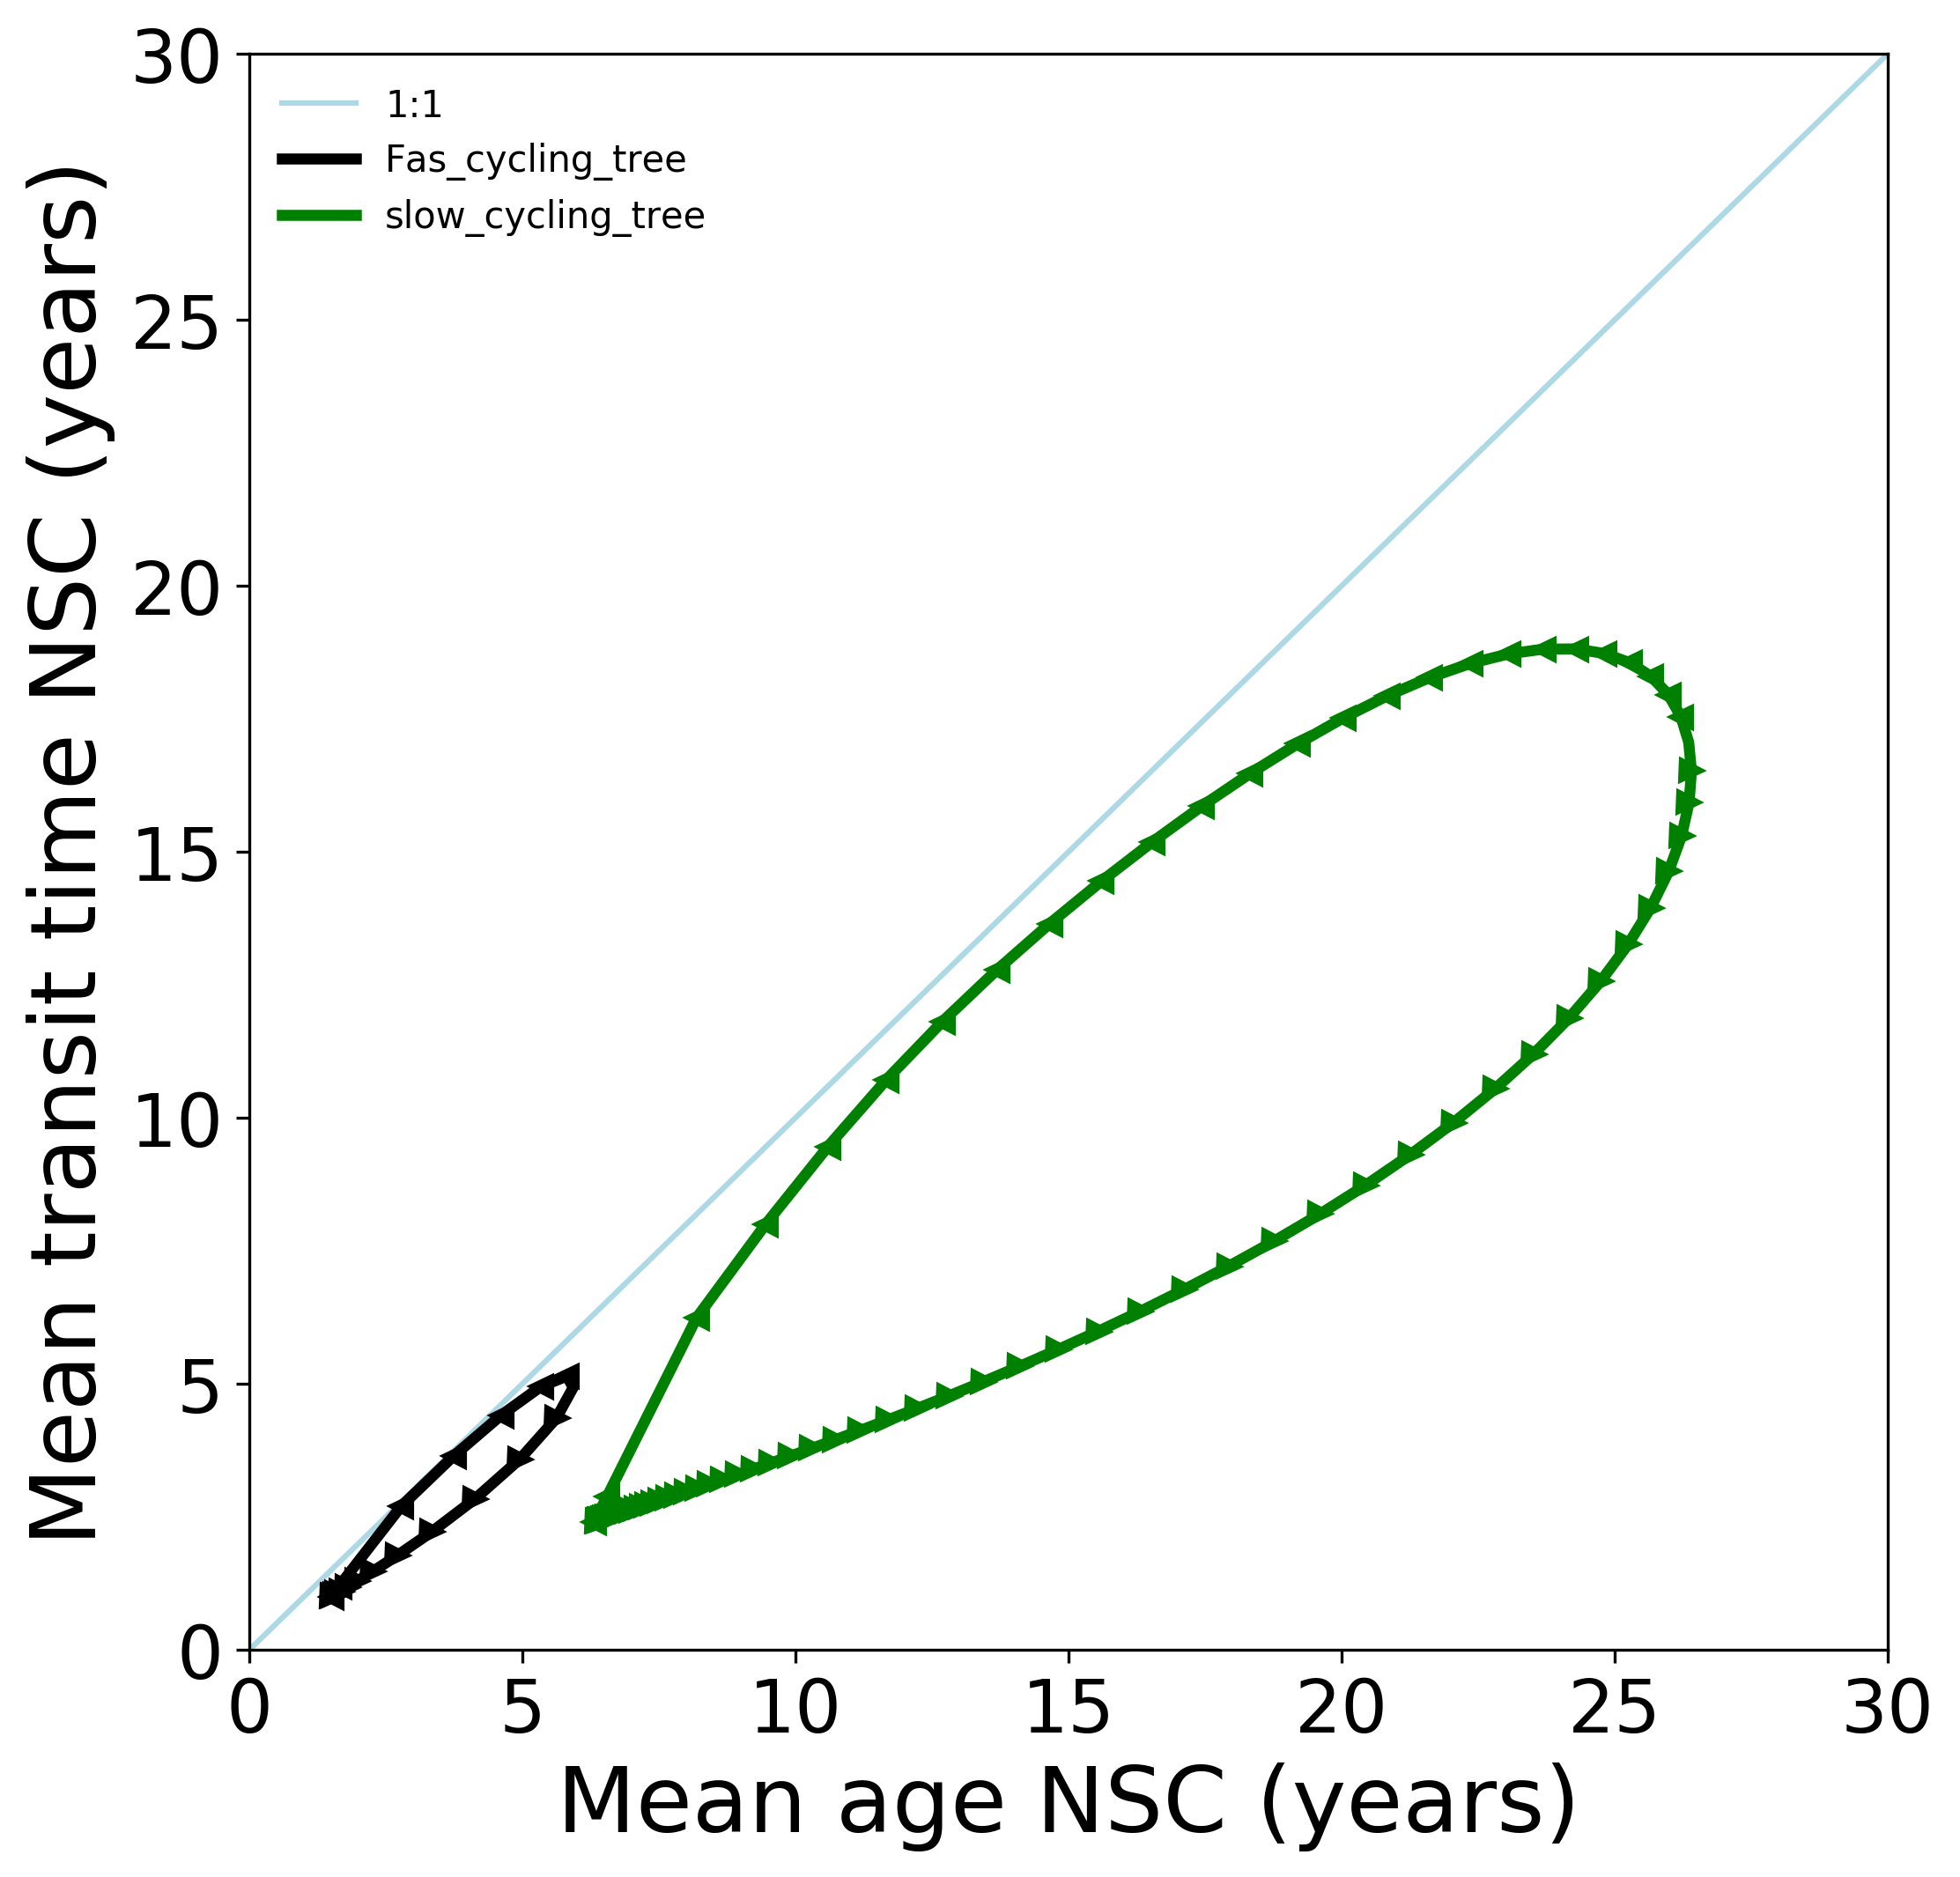

In [64]:
from mpl_toolkits.axisartist.axislines import Subplot
fig=plt.figure(figsize=(8,8), dpi=300)
ax=plt.subplot()
ax.plot(range(61), range(61), color="lightblue")
ax.plot(mean_sys_age, btt_moment, color="black", linewidth=3)
ax.plot(mean_sys_age2, btt_moment2, color="green", linewidth=3)
#ax.plot(mean_sys_age3, btt_moment3, color="blue", linewidth=3)
# ax.plot(mean_sys_age4, btt_moment4, color="darkred", linewidth=3)
# ax.plot(mean_sys_age5, btt_moment5, color="red", linewidth=3)
# ax.plot(mean_sys_age6, btt_moment6, color="purple", linewidth=3)
# ax.plot(mean_sys_age6[9:13], btt_moment6[9:13], "ro", color="purple")
ax.plot(mean_sys_age[9:16], btt_moment[9:16], "<", color="black")
ax.plot(mean_sys_age[17:30], btt_moment[17:30], ">", color="black")
ax.plot(mean_sys_age2[9:35], btt_moment2[9:35], "<", color="green")
ax.plot(mean_sys_age2[36:100], btt_moment2[36:100], ">", color="green")
#ax.plot(mean_sys_age3[9:14], btt_moment3[9:14], "<", color="blue")
#ax.plot(mean_sys_age3[15:20], btt_moment3[15:20], "<", color="blue")
# ax.plot(mean_sys_age4[9:12], btt_moment4[9:12], "ro", color="darkred")
# ax.plot(mean_sys_age5[9:45], btt_moment5[9:45], "ro", color="red")
plt.xlabel("Mean age NSC (years)", fontsize=25)
plt.ylabel("Mean transit time NSC (years)", fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.ylim(0,30)
plt.xlim(0,30)
plt.title('', fontsize=30)
plt.legend(["1:1","Fas_cycling_tree", "slow_cycling_tree"],
           title="",
           fontsize=10, 
           title_fontsize=10,
           frameon=False,
          loc='upper left')

plt.savefig('/Users/_dherrera/Documents/balzan_project/Perspective_NSC_age_vs_CO2_age/income_reduction', dpi=300)

plt.show()